In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../data/iris.csv")
df = df.drop("Id", axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Visualizations

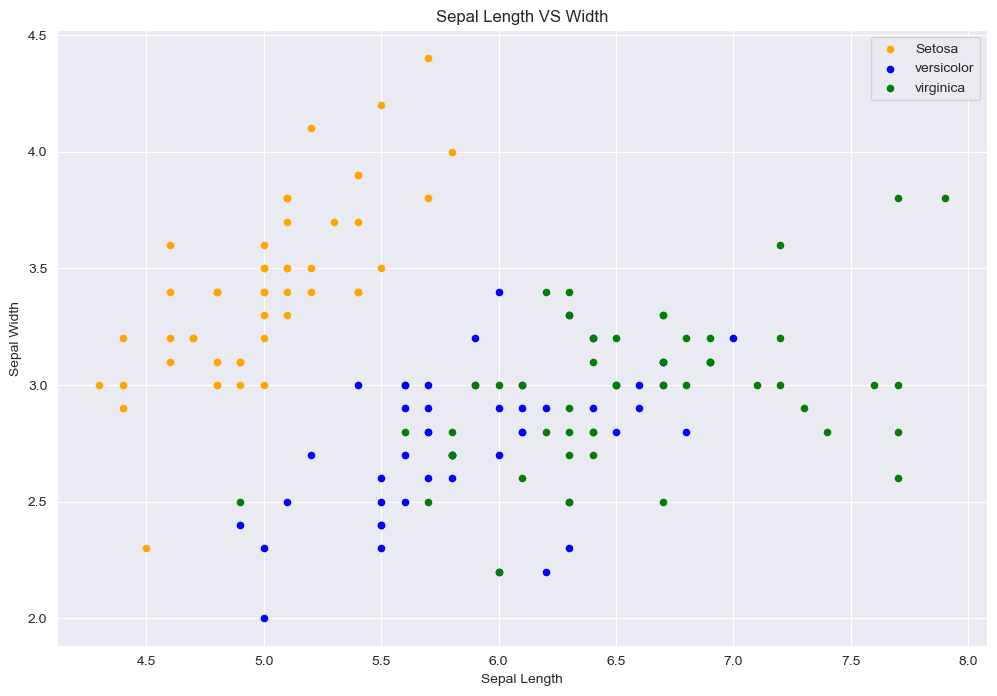

In [3]:
fig = df[df.Species == "Iris-setosa"].plot(
    kind="scatter", x="SepalLengthCm", y="SepalWidthCm", color="orange", label="Setosa"
)
df[df.Species == "Iris-versicolor"].plot(
    kind="scatter",
    x="SepalLengthCm",
    y="SepalWidthCm",
    color="blue",
    label="versicolor",
    ax=fig,
)
df[df.Species == "Iris-virginica"].plot(
    kind="scatter",
    x="SepalLengthCm",
    y="SepalWidthCm",
    color="green",
    label="virginica",
    ax=fig,
)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

# Train Test Split

In [4]:
train, test = train_test_split(df, test_size=0.3)
features_columns = [
    "SepalLengthCm",
    "SepalWidthCm",
    "PetalLengthCm",
    "PetalWidthCm",
]
X_train = train[features_columns]
y_train = train.Species
X_test = test[features_columns]
y_test = test.Species

# Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics

logreg = LogisticRegression(max_iter=150)
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
print("accuracy_score", metrics.accuracy_score(pred, y_test))

accuracy_score 0.9111111111111111


# Train a Model

In [6]:
model = svm.SVC(C=1.0, kernel="rbf")
model.fit(X_train, y_train)


SVC()

# Model Evaluation

In [7]:
pred = model.predict(X_test)
print(metrics.classification_report(pred, y_test))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.94      0.88      0.91        17
 Iris-virginica       0.88      0.94      0.91        16

       accuracy                           0.93        45
      macro avg       0.94      0.94      0.94        45
   weighted avg       0.93      0.93      0.93        45



# Support Vectors

In [8]:
print(len(model.support_vectors_))

46


# GridsearchCV

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.1, 1, 10, 100, 1000],
    "gamma": [1, 0.1, 0.01, 0.001, 0.0001],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
}

grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.952 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.952 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.952 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.952 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.952 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.952 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.952 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rb

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [10]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
SVC(C=0.1, gamma=0.1, kernel='poly')


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.94      0.94      0.94        16
 Iris-virginica       0.94      0.94      0.94        17

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



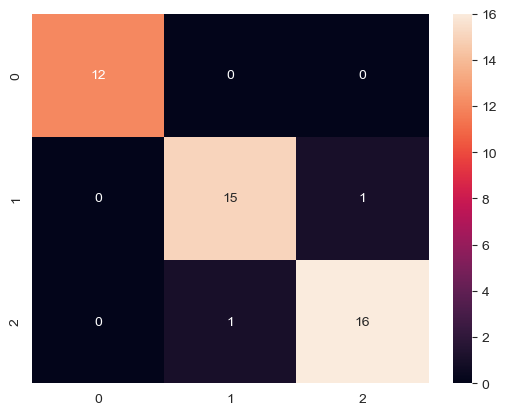

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

grid_pred = grid.predict(X_test)
sn.heatmap(confusion_matrix(y_test, grid_pred), annot=True)
print(classification_report(y_test, grid_pred))